In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Data Merging Missing Values
df = pd.read_csv('usa_rate.csv',encoding='iso-8859-1')
df1 = pd.read_csv('dataset.csv',encoding='iso-8859-1')
df_usa = df1[df1.iso == 'USA']
df_usa_29_10 = df_usa[(df_usa.year >= 1929) & (df_usa.year <= 2014)]

merged1 = pd.merge(df_usa_29_10, df, on='year')
merged = merged1.fillna(merged1.mean())

data = merged[['govvote', 'oppvote', 'frac', 'partycount', 'protests','protestsdev', 'demosdev',
        'strikesdev', 'rgdp', 'cpi', 'govcris']]

#scaler = StandardScaler()

#print(scaler.fit(data1))
#print(scaler.mean_)
#print(scaler.transform(data1))
#scaled_data = scaler.fit(data).transform(data)
#scaled_data.shape

In [2]:
#Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=5,svd_solver='arpack')

pca.fit(data)
pca_x = pca.transform(data)
pca_x.shape

(86, 5)

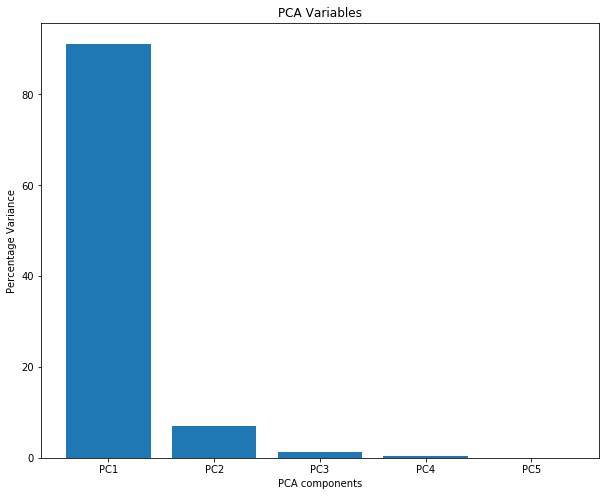

In [3]:
plt.figure(figsize=(10,8))
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.title('PCA Variables')
plt.xlabel('PCA components')
plt.ylabel('Percentage Variance')
plt.show()

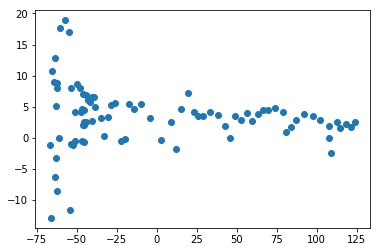

In [5]:
list_graph = []
list_graph.clear()


x = [pca_x[:,0]]
Y = merged.gdpgrowthrate
plt.scatter(x,Y)

In [6]:
X= pca_x[:,0].reshape(-1,1)

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import Perceptron, ElasticNetCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, chi2

#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.25,random_state=0)

#Linear Regression
reg = LinearRegression()
reg = reg.fit(x_train,y_train)
prdct_y = reg.predict(x_test)
train = reg.score(x_train,y_train)
test = reg.score(x_test,y_test)
reg_err = mean_absolute_error(y_test,prdct_y)
print('\nLinear Regression')
print("RMSE: {:.2f}". format(reg_err))
print("Train Score: {:.2f}". format(train))
print("Test Score: {:.2f}". format(test))
list_graph.append(test)

RMSE: 3.74
Train Score: 0.00
Test Score: -0.03


In [8]:
#Desicion tree
dtr = DecisionTreeRegressor(random_state=10, max_depth=9)
dtr = dtr.fit(x_train,y_train)

prediction = dtr.predict(x_test)
dtr_err = mean_absolute_error(y_test,prediction)
train = dtr.score(x_train,y_train)
test = dtr.score(x_test,y_test)

print('\nDecision Tree Regressor')
print("RMSE: {:.2f}". format(dtr_err))
print("Train Score: {:.2f}". format(train))
print("Test Score: {:.2f}". format(test))
list_graph.append(test)

RMSE: 3.84
Train Score: 0.93
Test Score: -0.04


In [9]:
#Gaussian Process
gpr = GaussianProcessRegressor()
gpr = gpr.fit(x_train,y_train)

predic = gpr.predict(x_test)
gpr_err = mean_absolute_error(y_test,predic)
train = gpr.score(x_train,y_train)
test = gpr.score(x_test,y_test)

print('\nGaussian Process Regressor')
print("RMSE: {:.2f}". format(gpr_err))
print("Train Score: {:.2f}". format(train))
print("Test Score: {:.2f}". format(test))
list_graph.append(gpr_err)

RMSE: 420.63
Train Score: 1.00
Test Score: -41844.53


In [10]:
#Random Forest
rfr = RandomForestRegressor(criterion='mse', max_depth=11, random_state=9)
rfr = rfr.fit(x_train,y_train)

predict = rfr.predict(x_test)

rfr_err = mean_absolute_error(y_test,predict)
train = rfr.score(x_train,y_train)
test = rfr.score(x_test,y_test)

print('\nRandom Forest Regressor')
print("RMSE: {:.2f}". format(rfr_err))
print("Train Score: {:.2f}". format(train))
print("Test Score: {:.2f}". format(test))
list_graph.append(rfr_err)

RMSE: 3.64
Train Score: 0.63
Test Score: 0.15


C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
#Neural Network
nn = MLPRegressor(activation='logistic',solver='sgd', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

nn.fit(x_train,y_train)  
predict = nn.predict(x_test)

nn_err = mean_absolute_error(y_test,predict)
train = nn.score(x_train,y_train)
test = nn.score(x_test,y_test)
print('\nNeural Network Regressor')
print("RMSE: {:.2f}". format(nn_err))
print("Train Score: {:.2f}". format(train))
print("Test Score: {:.2f}". format(test))
list_graph.append(test)

RMSE: 3.84
Train Score: -0.00
Test Score: -0.06


In [12]:
#LASSO
pp = Lasso()
pp = pp.fit(x_train,y_train)

predict = pp.predict(x_test)

pp_err = mean_absolute_error(y_test,predict)
train = pp.score(x_train,y_train)
test = pp.score(x_test,y_test)
print('\nLASSO Regressor')
print("RMSE: {:.2f}". format(pp_err))
print("Train Score: {:.2f}". format(train))
print("Test Score: {:.2f}". format(test))
#list_graph.append(rfr_err)

RMSE: 3.75
Train Score: 0.00
Test Score: -0.03


In [13]:
pca_x[:,0]

array([-60.70637121, -62.02269703, -63.5941819 , -65.86419151,
       -66.31915617, -65.33579062, -63.97759671, -63.31806323,
       -62.53720461, -62.57700159, -62.23959745, -61.95061949,
       -60.03776477, -57.03100148, -54.51733005, -53.49813633,
       -53.55189481, -53.96161715, -52.2098147 , -50.98556914,
       -50.92414846, -49.96064537, -48.00999175, -47.17731197,
       -46.69762107, -46.82504269, -46.14208821, -46.15727721,
       -45.40537777, -45.03961194, -44.04280764, -45.09484837,
       -43.90201726, -42.91625756, -45.14077237, -41.89873904,
       -40.61260732, -38.931479  , -40.384784  , -38.65747473,
       -34.69591232, -32.91946748, -30.37730352, -28.54359989,
       -25.71833279, -22.38364042, -19.91803907, -16.91668944,
       -13.82241838,  -9.75313207,  -3.87284034,   3.02027696,
         9.11654763,  12.40996129,  15.30211814,  19.84395597,
        23.52857357,  25.73153541,  29.29390878,  33.38340024,
        38.12578318,  42.85134167,  46.09327528,  49.31

In [14]:
#Prediction using Random Forest
rfr.predict([[-63.97759671]])

array([7.98])

In [15]:
merged.gdpgrowthrate

0      0.0
1     -8.5
2     -6.4
3    -12.9
4     -1.2
5     10.8
6      8.9
7     12.9
8      5.1
9     -3.3
10     8.0
11     8.8
12    17.7
13    18.9
14    17.0
15     8.0
16    -1.0
17   -11.6
18    -1.1
19     4.1
20    -0.6
21     8.7
22     8.0
23     4.1
24     4.7
25    -0.6
26     7.1
27     2.1
28     2.1
29    -0.7
      ... 
56     4.2
57     3.5
58     3.5
59     4.2
60     3.7
61     1.9
62    -0.1
63     3.5
64     2.8
65     4.0
66     2.7
67     3.8
68     4.4
69     4.5
70     4.8
71     4.1
72     1.0
73     1.7
74     2.9
75     3.8
76     3.5
77     2.9
78     1.9
79    -0.1
80    -2.5
81     2.6
82     1.6
83     2.2
84     1.8
85     2.5
Name: gdpgrowthrate, Length: 86, dtype: float64

In [3]:
merged.corr()

,ccode,year,govvote,oppvote,frac,partycount,right,left,extr,protests,...,pk_norm,pk_dis,cpi,govcris,turnover,vetopl,dict,election,election_year,gdpgrowthrate
ccode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,1.000000,-0.427889,0.219580,0.372653,-0.462387,NaN,NaN,NaN,-0.091567,...,-0.077837,-0.100837,0.937045,-0.190580,0.004631,NaN,NaN,0.020141,0.999797,-0.082345
govvote,NaN,-0.427889,1.000000,-0.940400,-0.427988,0.128073,NaN,NaN,NaN,0.219223,...,0.055662,0.081471,-0.346266,0.060702,0.136102,NaN,NaN,-0.032391,-0.428281,0.069071
oppvote,NaN,0.219580,-0.940400,1.000000,0.431582,-0.132088,NaN,NaN,NaN,-0.133703,...,-0.039015,-0.067449,0.091666,-0.020774,-0.118469,NaN,NaN,0.024832,0.219946,-0.030620
frac,NaN,0.372653,-0.427988,0.431582,1.000000,-0.002172,NaN,NaN,NaN,-0.024088,...,0.003447,-0.166852,0.346368,0.136450,-0.033197,NaN,NaN,0.007547,0.372578,-0.052926
partycount,NaN,-0.462387,0.128073,-0.132088,-0.002172,1.000000,NaN,NaN,NaN,-0.210344,...,0.057955,0.047235,-0.291678,0.121482,-0.103433,NaN,NaN,0.000000,-0.462106,0.410885
right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
protests,NaN,-0.091567,0.219223,-0.133703,-0.024088,-0.210344,NaN,NaN,NaN,1.000000,...,-0.070146,-0.059424,-0.148254,-0.014102,0.083600,NaN,NaN,-0.027873,-0.092073,-0.008745
